Comparison of inversion algorithm using the Cover Crop dataset
===


Removing 1 NaN from survey


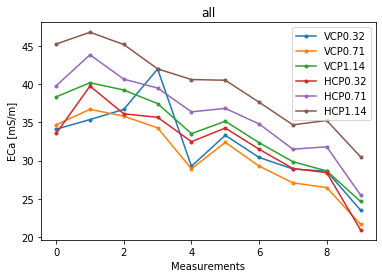

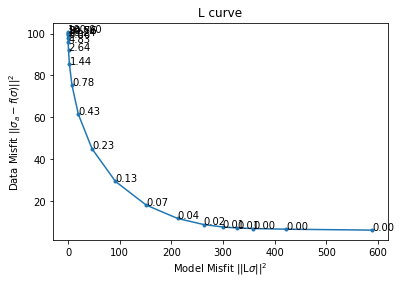

In [1]:
import sys
sys.path.append('../../src/')
import numpy as np
import matplotlib.pyplot as plt
from emagpy import Problem
datadir = '../src/examples/cover-crop/'

k = Problem()
k.createSurvey(datadir + 'coverCrop.csv', freq=30000)
k.surveys[0].df = k.surveys[0].df[:10]
k.show()
k.lcurve()
alpha = 0.13 # based on observation of the L-curve
k.setInit(depths0=np.array([0.3, 0.6, 1.2])) # depth bottom of layer in meters

Survey 1/1
10/10 inverted


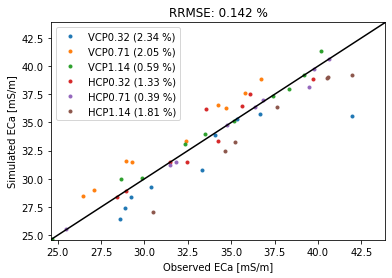

In [2]:
k.invert(method='CG', alpha=alpha, regularization='l1')

k.showOne2one(ax=None)


Survey 1/1one
10 measurements inverted (10 converged)


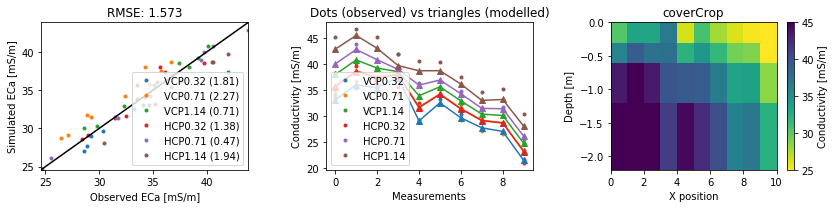

In [11]:
k.invert(alpha=alpha)
fig, axs = plt.subplots(1, 3, figsize=(12,3))
k.showOne2one(ax=axs[0])
k.showMisfit(ax=axs[1])
k.showResults(ax=axs[2], vmin=25, vmax=45)

Survey 1/1one
10 measurements inverted (10 converged)


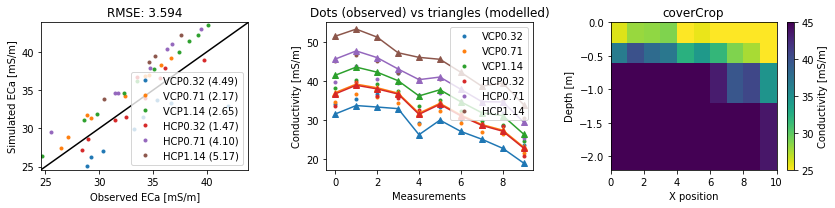

In [14]:
k.invert(forwardModel='Q', alpha=alpha) # as it's in quadrature the value of alpha doesn't have the same unit
fig, axs = plt.subplots(1, 3, figsize=(12,3))
k.showOne2one(ax=axs[0])
k.showMisfit(ax=axs[1])
k.showResults(ax=axs[2], vmin=25, vmax=45)

Observations
---
- all results are roughly equivalent between the methods
- concerning the RMSE, the best are given by `invertGN()` or `invert(forwardModel!=Q)`
- `invert(forwardModel='Q')` based on minimize the misfit in quadrature is quite good as well.

**Note**:
One main difference between `invertGN()` and `invert(method=CG)` is how the objective function is formulated. for `invertGN()` a traditional Gauss-Newton approach is followed where the misfit of all coils is reduced *at the same time*. While for the other method `CG` the objective function is setup to reduce the general misfit of all the coils together. This might be while there is discrepancy between the two.

Sensitivity to $\alpha$ (smoothing) parameter
---


In [15]:
alphas = np.logspace(-4, 3, 50)
def dump(x):
    pass

Text(0, 0.5, 'Depth [m]')

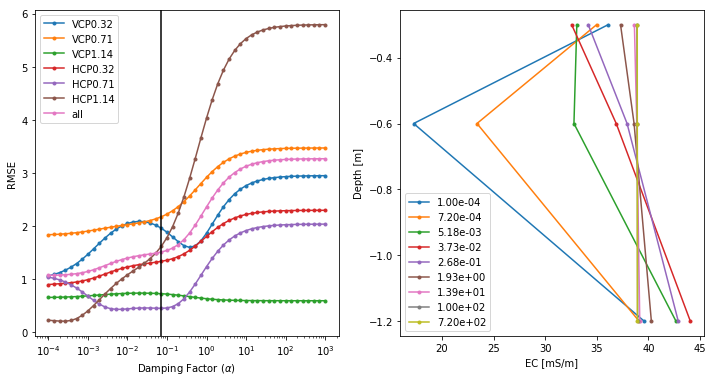

In [16]:
rmses = []
models = []
for alpha in alphas:
    k.invert(alpha=alpha, method='Nelder-Mead', dump=dump)
    rmses.append(k.getRMSE().values)
    models.append(k.models[0])
rmses = np.vstack(rmses)
models = np.dstack(models)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax = axs[0]
ax.plot(alphas, rmses, '.-')
ax.axvline(0.07, color='k')
ax.legend(np.r_[k.coils, ['all']])
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Damping Factor ($\alpha$)')
ax.set_xscale('log')
ax = axs[1]
ax.plot(models[2,:-1,::6], -k.depths0, '.-')
ax.legend(['{:.2e}'.format(a) for a in alphas][::6])
ax.set_xlabel('EC [mS/m]')
ax.set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

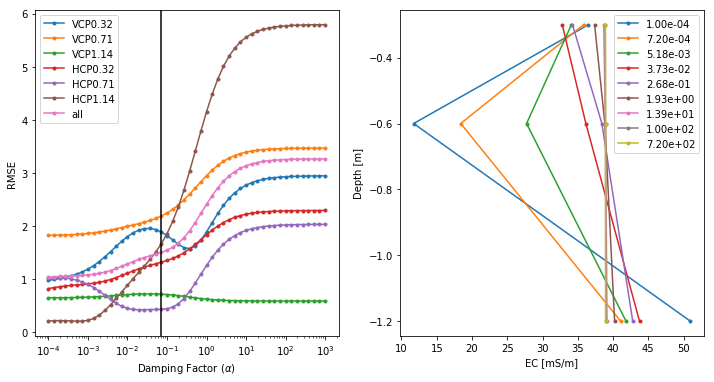

In [17]:
rmses = []
models = []
for alpha in alphas:
    k.invertGN(alpha=alpha, dump=dump)
    rmses.append(k.getRMSE().values)
    models.append(k.models[0])
rmses = np.vstack(rmses)
models = np.dstack(models)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax = axs[0]
ax.plot(alphas, rmses, '.-')
ax.axvline(0.07, color='k')
ax.legend(np.r_[k.coils, ['all']])
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Damping Factor ($\alpha$)')
ax.set_xscale('log')
ax = axs[1]
ax.plot(models[2,:-1,::6], -k.depths0, '.-')
ax.legend(['{:.2e}'.format(a) for a in alphas][::6])
ax.set_xlabel('EC [mS/m]')
ax.set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

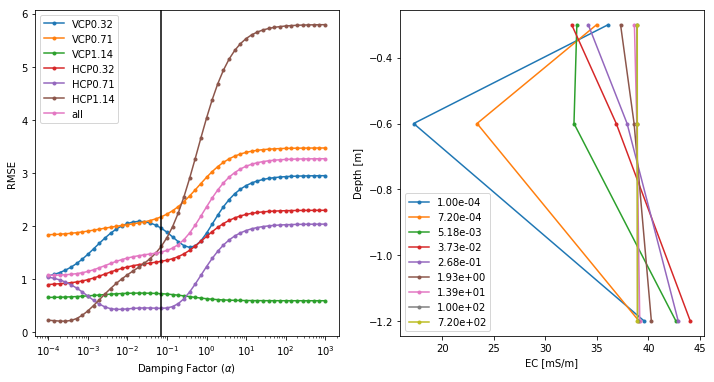

In [18]:
rmses = []
models = []
for alpha in alphas:
    k.invert(alpha=alpha, method='CG', dump=dump)
    rmses.append(k.getRMSE().values)
    models.append(k.models[0])
rmses = np.vstack(rmses)
models = np.dstack(models)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax = axs[0]
ax.plot(alphas, rmses, '.-')
ax.axvline(0.07, color='k')
ax.legend(np.r_[k.coils, ['all']])
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Damping Factor ($\alpha$)')
ax.set_xscale('log')
ax = axs[1]
ax.plot(models[2,:-1,::6], -k.depths0, '.-')
ax.legend(['{:.2e}'.format(a) for a in alphas][::6])
ax.set_xlabel('EC [mS/m]')
ax.set_ylabel('Depth [m]')

Observations
---
- all methods are very similar and behaves the same way for different value of damping factor $\alpha$.